In [1]:
import scipy.io as sio
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
ds = sio.loadmat('face.mat')

In [2]:
X = ds['X']
l = ds['l'][0]
W = 46
H = 56
X = pd.DataFrame(X.transpose())
N = X.shape[0]*0.75
l = pd.DataFrame(l)

In [3]:
X_train, X_test, l_train, l_test = train_test_split(X, l, test_size=0.25)
# X_bar = np.mean(X, axis=1)
X_train, X_test = np.transpose(X_train.values), np.transpose(X_test.values)
X_bar = np.transpose([np.mean(X_train, axis=1)])

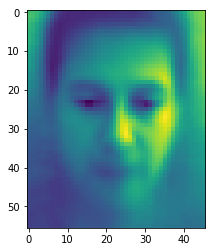

In [4]:
A = np.subtract(X_train,X_bar)
# print(A.shape)
# print(np.transpose(X_train)[0]/255)
mean_img = np.transpose(np.array_split(np.concatenate(X_bar,axis=0)/255, W))
person = np.transpose(np.array_split(np.transpose(X_train)[0]/255, W))
# print(person)
imgplot = plt.imshow(mean_img)

In [5]:

# print(X_bar)
S = np.matmul(A,np.transpose(A))/N
w, v = np.linalg.eig(S)

c:\users\georg\appdata\local\programs\python\python35\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


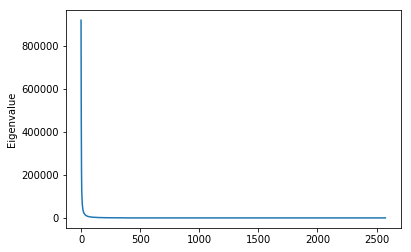

In [6]:
sorted(w,reverse=True)
plt.plot(w)
plt.ylabel('Eigenvalue')
plt.show()

c:\users\georg\appdata\local\programs\python\python35\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


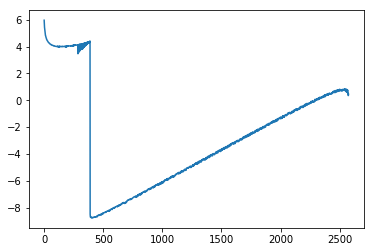

In [7]:
aic = np.zeros_like(w)
N_eig = w.shape[0]
for i in range(N_eig):
    aic[i] = np.log10(w[i])+2*i/390
plt.plot(aic)

In [8]:
test = min(aic[0:130])
print(test)
ind = np.argmin(aic[0:130])
print(ind)

(3.969475759473107+0j)
125


In [9]:
print(w[20])

(28854.46059083655+0j)
